# BECHEUR Yazid
------

# PROJET 10
#  <font color="#8333ff">D√âTECTER DES FAUX BILLETS AVEC PYTHON</font>
-------

# CONTEXTE ET OBJECTIF DE LA MISSION : 

L‚ÄôOrganisation nationale de lutte contre le faux-monnayage, ou ONCFM souhaite renforcer ses m√©thodes d‚Äôidentification des contrefa√ßons des billets en euros et pour cela nous confie la mission :
- De mettre en place un algorithme qui soit capable de diff√©rencier automatiquement les vrais des faux billets.
- L‚Äôalgorithme doit pouvoir diff√©rencier les vrais des faux billets √† partir des caract√©ristique g√©om√©triques de ces derniers

--------

# PLAN DE TRAVAIL

## I. IMPORTATION DES LIBRAIRIES
      - pandas - numpy - seaborn - matplotlib - scipy - sklearn - statsmodels
      
## II. IMPORTATION DES DONN√âES
      1. DEFFINITION DES VARIABLES
      
## III. EXPLORATION ET NETTOYAGE DES DONN√âES
      1. EXPLORATION DESCRIPTIVES DES VARIABLES
      2. TRAITEMENT DES VALEURS MANQUANTES
           - REGRESSION LIN√âAIRE
      
## IV. MOD√àLISATION
      1. REGR√âSSION LOGISTIQUE AVEC k-NN
      2. CLUSTERING AVEC k-means
      3. REGR√âSSION LOGISTIQUE AVEC LogisticRegression

## V. CONCLUSION
      - DEPLOIEMENT DU MOD√àLE SELECTIONN√â
------

##  <font color="#8333ff">I. IMPORTATION DES LIBRAIRIES</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import t, shapiro
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import neighbors,model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,silhouette_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import decomposition
from sklearn.cluster import KMeans
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from functions import *
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore")

-------
## <font color="#8333ff">II. IMPORTATION DES DONN√âES</font>
------

In [2]:
# Importer le dataset billets
data = pd.read_csv('billets.csv',sep = ';')
billets=data.copy()
billets.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

#### 1. DEFFINITION DES VARIABLES

#### Dimensions g√©om√©triques 
Nous disposons actuellement de six informations g√©om√©triques sur un
billet :
  - length : la longueur du billet (en mm) ;
  - height_left : la hauteur du billet (mesur√©e sur le c√¥t√© gauche, en
mm) ;
  - height_right : la hauteur du billet (mesur√©e sur le c√¥t√© droit, en mm) ;
  - margin_up : la marge entre le bord sup√©rieur du billet et l'image de
celui-ci (en mm) ;
  - margin_low : la marge entre le bord inf√©rieur du billet et l'image de
celui-ci (en mm) ;
  - diagonal : la diagonale du billet (en mm).

In [3]:
data.shape

(1500, 7)

----
## <font color="#8333ff">III. EXPLORATION DES DONN√âES</font>

### Objectif :
- Comprendre du mieux possible nos donn√©es 
- D√©velopper une premiere strat√©gie de mod√©lisation

### Checklist de base
###### Analyse de Forme :
- variable target : is_genuine
- lignes et colonnes : 1500, 7
- types de variables : qualitatives : 1, quantitatives : 6
- Analyse des valeurs manquantes : 37

#### Signification des variables

##### Dimensions g√©om√©triques 
Nous disposons actuellement de six informations g√©om√©triques sur un
billet :
- length : la longueur du billet (en mm) ;
- height_left : la hauteur du billet (mesur√©e sur le c√¥t√© gauche, en
mm) ;
- height_right : la hauteur du billet (mesur√©e sur le c√¥t√© droit, en mm) ;
- margin_up : la marge entre le bord sup√©rieur du billet et l'image de
celui-ci (en mm) ;
- margin_low : la marge entre le bord inf√©rieur du billet et l'image de
celui-ci (en mm) ;
- diagonal : la diagonale du billet (en mm).

#### Distribution des variables :

Pour chaque variable les faux billets et les vrais billets pr√©sentent respective√πment une distribution sym√©trique

#### Relation Variables / Target :

- Le taux de vrais billets est bien nettement plus √©lev√©s

### 1. EXPLORATION DESCRIPTIVES DES VARIABLES

In [4]:
# v√©rifier les valeurs que prend la colonne is_genuine
billets['is_genuine'].unique()

array([ True, False])

In [5]:
# Encoder la variable is_genuine
billets['is_genuine'].replace([False,True], [0,1], inplace=True)
billets.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [6]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB


In [7]:
# V√©rification des valeurs manquantes
billets.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

#### 37 valeurs manquantes pour la variable margin_low 

In [8]:
billets.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

#### EXPLORATION DE LA DISTRIBUTIONS DES VARIABLES ET LES VALEURS ABERRANTES

<AxesSubplot:ylabel='margin_low'>

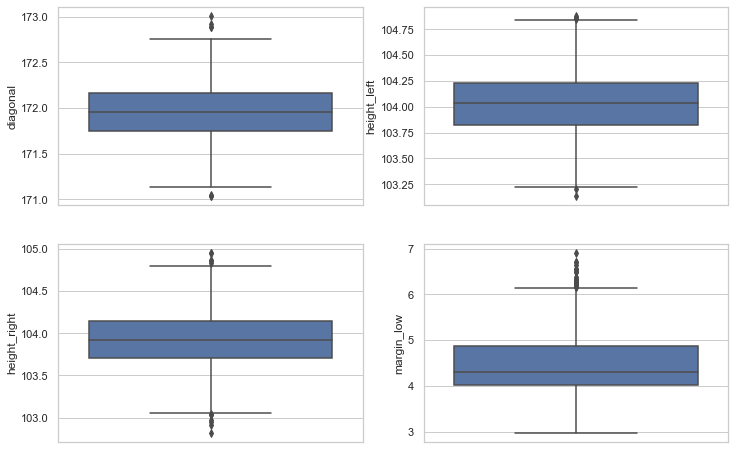

In [9]:
# Afficher des boxplot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=billets,y='diagonal')
plt.subplot(222)
sns.boxplot(data=billets, y='height_left')
plt.subplot(223)
sns.boxplot(data=billets, y='height_right')
plt.subplot(224)
sns.boxplot(data=billets,y='margin_low')

<AxesSubplot:ylabel='length'>

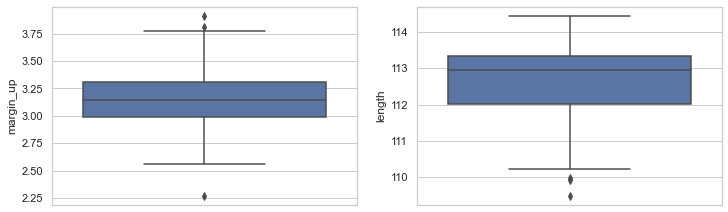

In [10]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=billets,  y='margin_up')
plt.subplot(222)
sns.boxplot(data=billets,  y='length')

#### LES MOYENNES

In [11]:
# afficher les moyennes de variables
billets.mean()

is_genuine        0.666667
diagonal        171.958440
height_left     104.029533
height_right    103.920307
margin_low        4.485967
margin_up         3.151473
length          112.678500
dtype: float64

#### MATRICES DE CORR√âLATION

In [12]:
# Afficher la matrice de corr√©lation
corr_df = billets.corr()
h=pd.DataFrame(corr_df)
h.head(10)

is_genuine  diagonal  height_left  height_right  margin_low  \
is_genuine      1.000000  0.132756    -0.379833     -0.485092   -0.783032   
diagonal        0.132756  1.000000     0.019472     -0.024492   -0.111534   
height_left    -0.379833  0.019472     1.000000      0.242279    0.302643   
height_right   -0.485092 -0.024492     0.242279      1.000000    0.391085   
margin_low     -0.783032 -0.111534     0.302643      0.391085    1.000000   
margin_up      -0.606262 -0.055649     0.246522      0.307005    0.431606   
length          0.849285  0.097587    -0.320863     -0.401751   -0.666753   

              margin_up    length  
is_genuine    -0.606262  0.849285  
diagonal      -0.055649  0.097587  
height_left    0.246522 -0.320863  
height_right   0.307005 -0.401751  
margin_low     0.431606 -0.666753  
margin_up      1.000000 -0.520575  
length        -0.520575  1.000000

<AxesSubplot:>

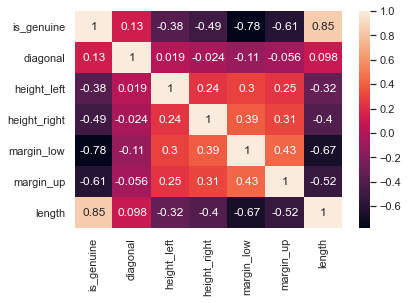

In [13]:
# heatmap de corr√©lations entre les diff√©rentes variables
sns.heatmap(billets.corr(), annot=True)

<Figure size 72x72 with 0 Axes>

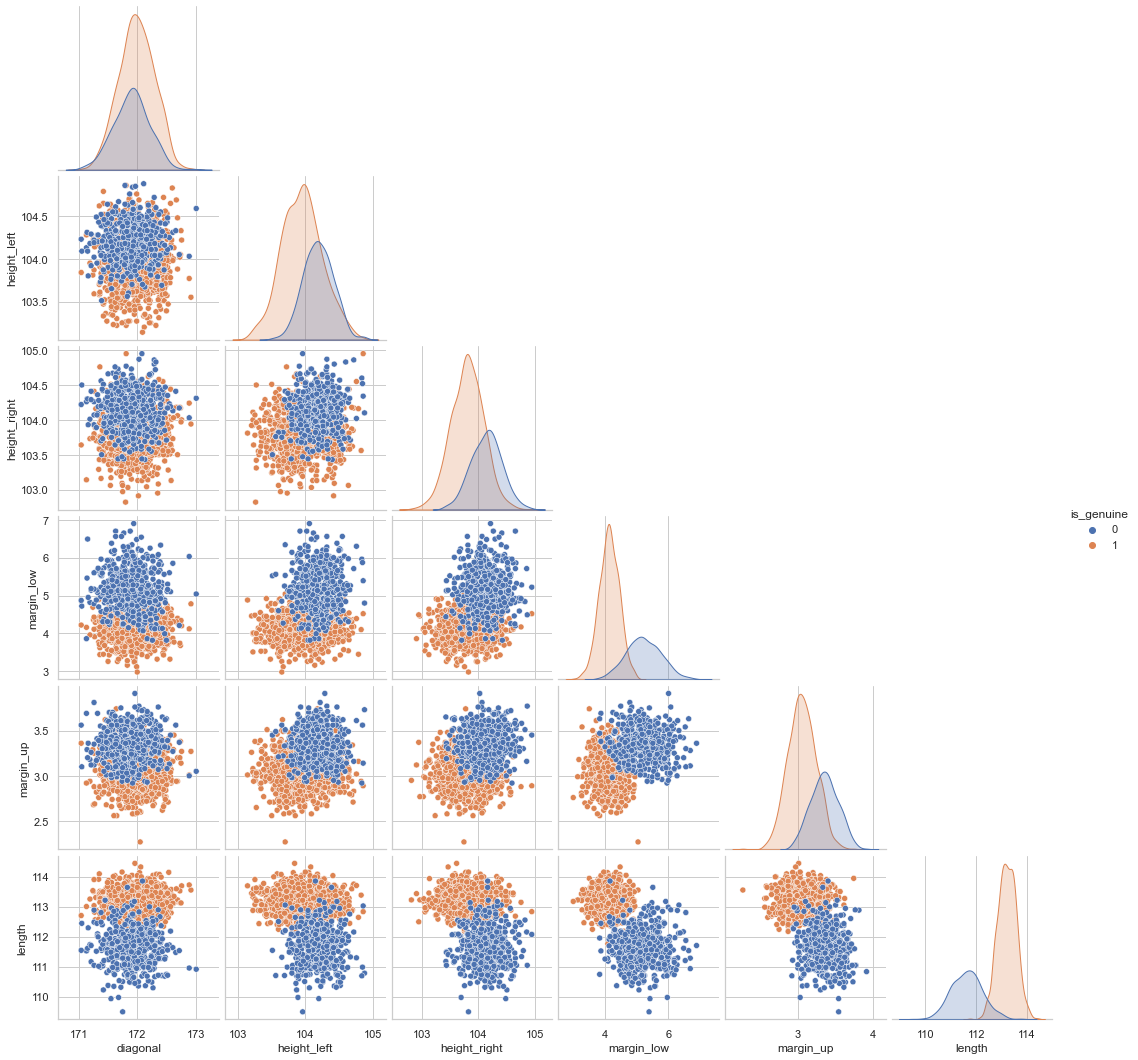

In [14]:
plt.figure(figsize=(1, 1))
sns.pairplot(billets,hue='is_genuine',corner=True)

Text(0.5, 1.0, 'Taux des vrais et faux billets')

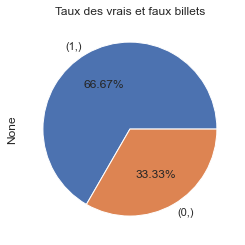

In [15]:
# afficher les taux de faux billets et des vrais billets
billets[['is_genuine']].value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')
plt.title('Taux des vrais et faux billets')

####  COLINEARITE DES VARIABLES

- Les 2 variables length et margin_up sont corr√©l√©es √† hauteur de -0.52
- L'une de ces 2 variables devera √™tre √©cart√© de l'analyse pour optimiser le calcul des param√®tres

### 2. TRAITEMENT DES VALEURS MANQUANTES
-----

### Utilisation du mod√®le de r√©gression lin√©aire multivariables pour traiter nos valeurs manquantes

Nous allons s√©parer le dataframe original en 2:
- un dataframe sans valeur manquantes que nous utiliserons pour notre r√©gression lini√©aire
- un dataframe avec uniquement les valeurs manquantes pour appliquer notre mod√®le

In [16]:
billets.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [17]:
# dataset avec les valeurs manquantes
val_manq=billets.loc[billets['margin_low'].isnull(),['is_genuine','diagonal','height_left','height_right','margin_up','length']]
val_manq.head()

is_genuine  diagonal  height_left  height_right  margin_up  length
72            1    171.94       103.89        103.45       3.25  112.79
99            1    171.93       104.07        104.18       3.14  113.08
151           1    172.07       103.80        104.38       3.02  112.93
197           1    171.45       103.66        103.80       3.62  113.27
241           1    171.83       104.14        104.06       3.02  112.36

### Cr√©ation du dataframe pour notre analyse


In [18]:
# dataset sans les valeurs manquantes
df1=billets.dropna()
df1.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

## Retirez les variables non significatives

On constate ici que certains param√®tres ne sont pas significativement diff√©rents de 0, car leur p-valeur n'est pas inf√©rieure √† 5 %, le niveau de test que nous souhaitons.

- Le  ùëÖ2  vaut environ 0.61, et le  ùëÖ2  ajust√© est d'environ 0.61.
- Nous conserverons uniquement les variables dont les param√®tres son significatis

In [19]:
columns = ['margin_low','diagonal','is_genuine','height_left','height_right','margin_up','length']
reg_backward = backward_selected(df1[columns], 'margin_low')

_______________________________
margin_low ~ diagonal + length + height_left + is_genuine + margin_up + height_right + 1
remove length (p-value : 0.868 )

_______________________________
margin_low ~ diagonal + height_left + is_genuine + margin_up + height_right + 1
remove diagonal (p-value : 0.719 )

_______________________________
margin_low ~ height_left + is_genuine + margin_up + height_right + 1
remove height_right (p-value : 0.496 )

_______________________________
margin_low ~ height_left + is_genuine + margin_up + 1
remove height_left (p-value : 0.454 )

_______________________________
margin_low ~ is_genuine + margin_up + 1
is the final model !

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                

#### Explorer les valeurs atypiques de la variable margin_up

<AxesSubplot:ylabel='margin_up'>

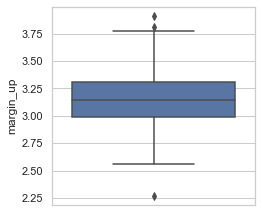

In [20]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=billets,  y='margin_up')

#### Nous supprimons les valeurs atypiques de la variable margin_up

In [21]:
df1=df1.loc[(df1['margin_up']>2.40) & (df1['margin_up']<3.75)]
#df1.sort_values(by = 'margin_up', ascending = False)

### Nous conserverons uniquement les 2 vrariables retenues pour notre analyse

In [22]:
df2= df1.drop(['diagonal','length','height_right','height_left'],axis=1)
# v√©rification de la supression des valeurs manquantes
df2.head()

is_genuine  margin_low  margin_up
0           1        4.52       2.89
1           1        3.77       2.99
2           1        4.40       2.94
3           1        3.62       3.01
4           1        4.04       3.48

### Cr√©ation du mod√®le sur les 2 variables is_genuine et margin_up

In [23]:
reg_multi = smf.ols('margin_low~+is_genuine+margin_up ', data=df2).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1173.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          6.00e-304
Time:                        15:48:08   Log-Likelihood:                -765.65
No. Observations:                1456   AIC:                             1537.
Df Residuals:                    1453   BIC:                             1553.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9157      0.200     29.550      0.0

#### Visualiser la distribution de nos erreurs (valeurs absolues)sous forme d'histogramme

 - La quantit√© d'erreurs suit une loi exponentielle, elle baisse avec l'augmentation de la valeur de l'erreur

In [24]:
x_regr=df2.loc[:,['is_genuine','margin_up']]
ytest=df1['margin_low']

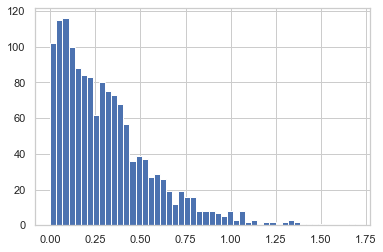

In [25]:
# Repr√©senter nos erreurs avec un histogramme
y_pred=reg_multi.predict(x_regr)
erreur_hi=np.abs(ytest-y_pred)
plt.hist(erreur_hi,bins=50)
plt.show()

### EVALUATION DU MODELE

In [26]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, median_absolute_error
print("Mean Absolute Error MAE : ", mean_absolute_error(ytest,y_pred ))
print("Erreur Quadratique Moyenne RMSE : ", np.sqrt(mean_squared_error(ytest,y_pred)) )
print("Median Absolute Error : ", median_absolute_error(ytest,y_pred ))
print("Coefficient de Determination R2 : ", r2_score(ytest,y_pred ))

Mean Absolute Error MAE :  0.3146230273938587
Erreur Quadratique Moyenne RMSE :  0.409392054409251
Median Absolute Error :  0.260433739061233
Coefficient de Determination R2 :  0.6175042221015479


### V√©rification de la normalit√© des r√©sidus

In [27]:
# Moyenne des r√©sidus
o=ytest-y_pred
o.mean()

-8.973286094635194e-15

### Si l'on veut tester la normalit√© des r√©sidus, on peut faire √©galement un test de Shapiro-Wilk.

In [28]:
from scipy import stats
shapiro_test = stats.shapiro(o)
shapiro_test

ShapiroResult(statistic=0.9933310747146606, pvalue=3.882856162817916e-06)

Ici, l'hypoth√®se de normalit√© est remise en cause (p-value = 0.0008 < 0.05).

N√©anmoins, l'observation des r√©sidus, le fait qu'ils ne soient pas tr√®s diff√©rents d'une distribution sym√©trique, et le fait que l'√©chantillon soit de taille suffisante (sup√©rieure √† 30) permettent de dire que les r√©sultats obtenus par le mod√®le lin√©aire gaussien ne sont pas absurdes, m√™me si le r√©sidu n'est pas consid√©r√© comme √©tant gaussien.

<AxesSubplot:ylabel='Density'>

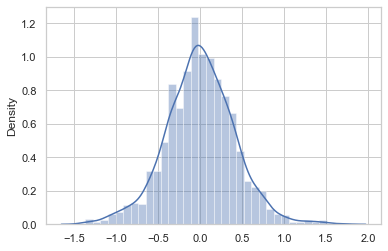

In [29]:
sns.distplot(o)

#### la distribution des r√©sidus est bien sym√©trique dont la moyenne est proche de 0

### Utilisation de la dorite de HENRY 

Mise en relation les valeurs des r√©sidus (abscisses) avec des valeurs construites sous l'hypoth√®se que la distribution des r√©sidus est normale.
- Le r√©sultat ci dessous est assez satisfaisant.

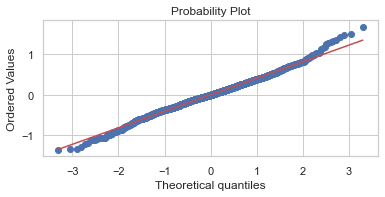

In [30]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(o, plot=ax, fit=True)

### Normalit√© des r√©sidus en fonction des valeurs pr√©dites

#### Homosc√©dasticit√©

Elle s'observe lorsque la dispersion des residus est homog√®ne ce qui est bien le cas √ßi-dessous, donc la constance de la variance des r√©sidus, ce qui valide l'hypoth√®se de lin√©arit√© de notre mod√®le.

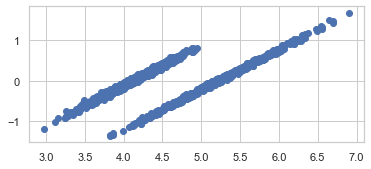

In [31]:
fig, ax = plt.subplots(figsize=(6,2.5))
_= ax.scatter(ytest,o)

## V√©rifier la colin√©arit√© des variables

In [32]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5861228832253473, 1.586122883225347]

Ici, tous les coefficients sont inf√©rieurs √† 10, il n'y a donc pas de probl√®me de colin√©arit√©.

### Reconstituer le dataframe finale en ins√©rant les valeurs manquantes pr√©dites

In [33]:
# Cr√©er un dataframe san valeurs manquantes et sans la colonne margin_low

val_manq.head()

is_genuine  diagonal  height_left  height_right  margin_up  length
72            1    171.94       103.89        103.45       3.25  112.79
99            1    171.93       104.07        104.18       3.14  113.08
151           1    172.07       103.80        104.38       3.02  112.93
197           1    171.45       103.66        103.80       3.62  113.27
241           1    171.83       104.14        104.06       3.02  112.36

In [34]:
pred=val_manq.drop(['diagonal','height_left','height_right','length'],axis=1)

val_pred=reg_multi.predict(pred)
val_manq['margin_low_pred']=val_pred

In [35]:
data_final = billets.copy()
data_final.loc[val_manq.index, 'margin_low'] = val_manq['margin_low_pred']
data_final.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [36]:
data_final.shape

(1500, 7)

In [37]:
# v√©rification des valeurs nulles
data_final.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

### Visualisation de la distribution des diff√©rentes variables selon les 2 modalit√©s : vrais et faux billets

Pour √©tudier le fait d'avoir un vrai ou faux billets en fonction des dif√©rentes variables

La distribution des variables selon les 2 modalit√©s, vrai et faux billet met en √©vidence les diff√©rentes variations 
Ainsi les variables qui semblent le plus impact√©es :

      - length
      - margin_low
      - margin_up
      - height_right

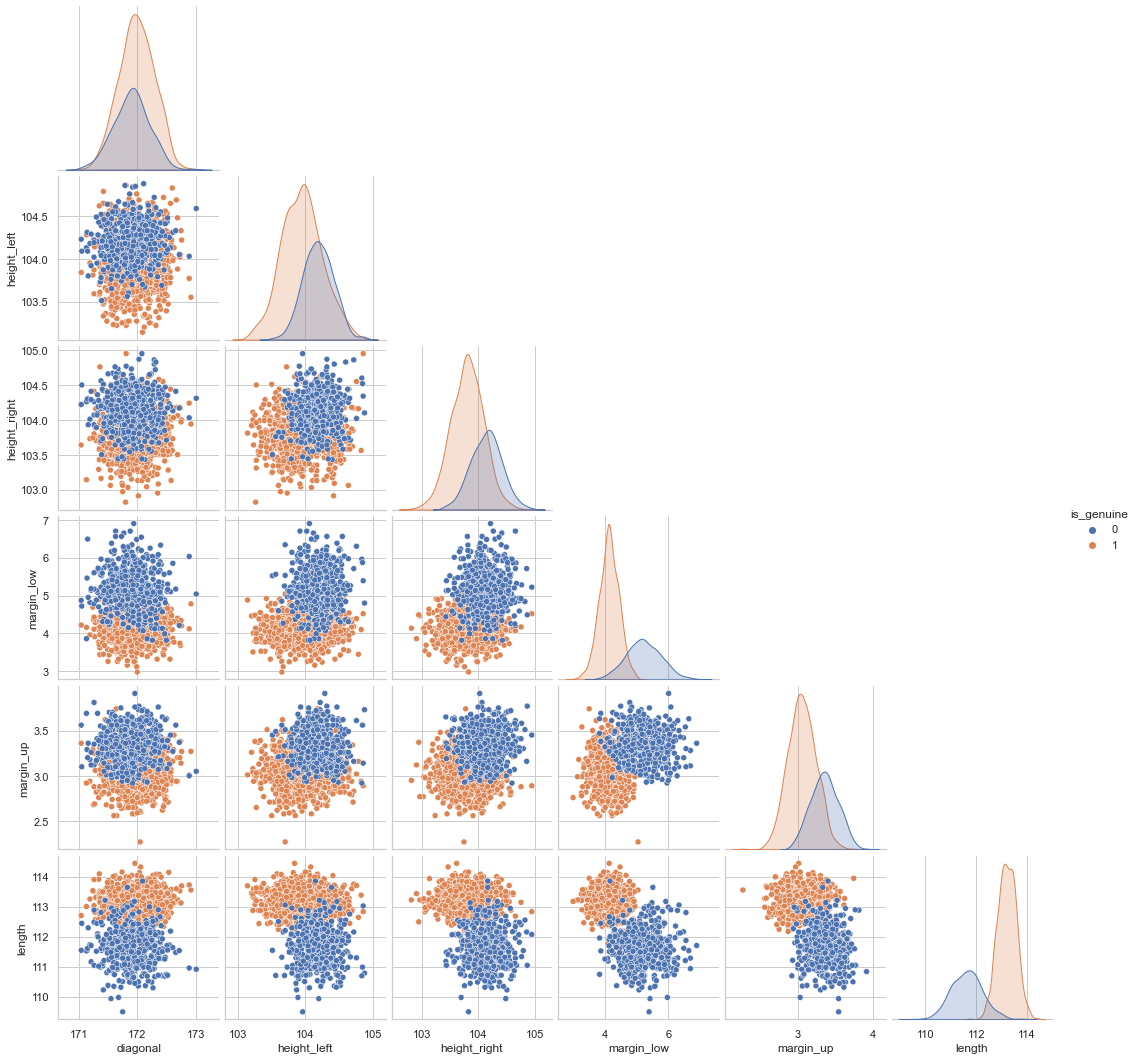

In [38]:
sns.pairplot(data_final,hue='is_genuine',corner=True)
#plt.title('REPREVARIABLES')
plt.savefig('Variables.jpg')
plt.show()

### Analyse de la variance (ANOVA) √† 1 facteur
Effectuer une analyse pour mettre en √©vidence la d√©pendance entre les 2 modalit√©s(vrai et faux billets) du facteur 'is_genuine' et les variables de notre dataset.
- Afficher la relation du facteur 'is_genuine' et le reste des variables √† travers des boites √† moustaches
- Cette analyse (ANOVA)est bas√© sur le test de Fisher

In [39]:
data_final.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

Text(0.5, 1.0, 'Bo√Ætes √† moustaches')

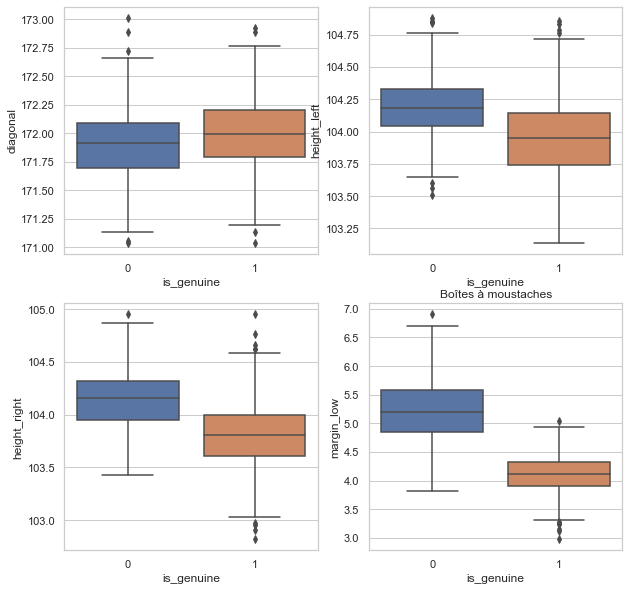

In [40]:
# Afficher des boxplot
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(x="is_genuine", y="diagonal", data=data_final)
plt.subplot(222)
sns.boxplot(x="is_genuine", y="height_left", data=data_final)
plt.subplot(223)
sns.boxplot(x="is_genuine", y="height_right", data=data_final)
plt.subplot(224)
sns.boxplot(x="is_genuine", y="margin_low", data=data_final)
plt.title('Bo√Ætes √† moustaches')

<AxesSubplot:xlabel='is_genuine', ylabel='length'>

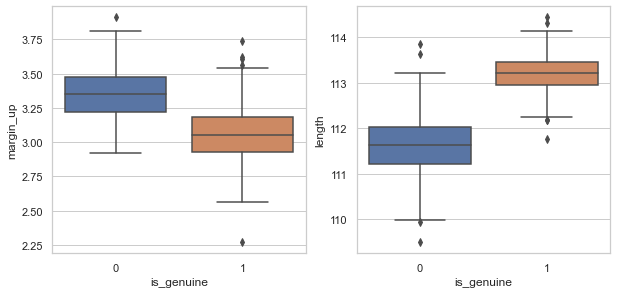

In [41]:
# Afficher des boxplot
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(x="is_genuine", y="margin_up", data=data_final)
plt.subplot(222)
sns.boxplot(x="is_genuine", y="length", data=data_final)

- Les boites √† moustaches indiquent une diff√©rence de variances assez nette entre vrais et faux billets concernant chaque variable.
- On constate n√©anmoins qu'elle est moindre pour la variable 'diagonal'

### Effectuer le test pour v√©rifier cette observation = d√©pendances au facteur 'is_genuine'

In [42]:
from IPython.display import display
liste_variable=['diagonal~is_genuine','height_left~is_genuine','height_right~is_genuine','margin_low~is_genuine','margin_up~is_genuine','length~is_genuine']

liste_Df=[]
for a in liste_variable:
    anova_var=smf.ols(a, data=data_final).fit()
    #print(sm.stats.anova_lm(anova_var, typ=2))
    df=pd.DataFrame(sm.stats.anova_lm(anova_var, typ=2))
    display(a,df)
    #print(a,':',df.head(),'\n')
    


'diagonal~is_genuine'

sum_sq      df          F        PR(>F)
is_genuine    2.460749     1.0  26.874763  2.466867e-07
Residual    137.162201  1498.0        NaN           NaN

'height_left~is_genuine'

sum_sq      df           F        PR(>F)
is_genuine   19.394088     1.0  252.558393  1.126916e-52
Residual    115.032185  1498.0         NaN           NaN

'height_right~is_genuine'

sum_sq      df           F        PR(>F)
is_genuine   37.401634     1.0  460.974212  2.270856e-89
Residual    121.541825  1498.0         NaN           NaN

'margin_low~is_genuine'

sum_sq      df            F         PR(>F)
is_genuine  403.353361     1.0  2423.639486  2.341524e-315
Residual    249.304131  1498.0          NaN            NaN

'margin_up~is_genuine'

sum_sq      df           F         PR(>F)
is_genuine  29.607294     1.0  870.581394  3.144530e-151
Residual    50.944950  1498.0         NaN            NaN

'length~is_genuine'

sum_sq      df            F  PR(>F)
is_genuine  823.507935     1.0  3876.654138     0.0
Residual    318.216390  1498.0          NaN     NaN

- La p-valeur de ce test pour toutes les variables est tr√®s petite et largement inf√©rieure √† 5 %. On rejette donc l'hypoth√®se H0 selon laquelle  Œ±1=Œ±2=0 .

- Les modalit√©s vrai et faux billets pr√©sentent bien un effet sur nos variables

## <font color="#8333ff">IV. MOD√àLISATION</font>

#### V√©rification des donn√©es, l'√©chelle de grandeur des donn√©es n'est pas la m√™me

In [43]:
data_final.describe()

is_genuine     diagonal  height_left  height_right   margin_low  \
count  1500.000000  1500.000000  1500.000000   1500.000000  1500.000000   
mean      0.666667   171.958440   104.029533    103.920307     4.482836   
std       0.471562     0.305195     0.299462      0.325627     0.659845   
min       0.000000   171.040000   103.140000    102.820000     2.980000   
25%       0.000000   171.750000   103.820000    103.710000     4.027500   
50%       1.000000   171.960000   104.040000    103.920000     4.310000   
75%       1.000000   172.170000   104.230000    104.150000     4.870000   
max       1.000000   173.010000   104.880000    104.950000     6.900000   

         margin_up      length  
count  1500.000000  1500.00000  
mean      3.151473   112.67850  
std       0.231813     0.87273  
min       2.270000   109.49000  
25%       2.990000   112.03000  
50%       3.140000   112.96000  
75%       3.310000   113.34000  
max       3.910000   114.44000

#### S√©parons nos donn√©es en un jeu d‚Äôentra√Ænement et un jeu de test. Le jeu de test contiendra 30% des donn√©es.

In [44]:
x2train, x2test, y2train, y2test = train_test_split(data_final.drop(["is_genuine"],axis=1), data_final[["is_genuine"]], test_size=0.2)


#### Nous pouvons maintenant standardiser les donn√©es d‚Äôentra√Ænement et appliquer la m√™me transformation aux donn√©es de test :

In [45]:
std_scale = preprocessing.StandardScaler().fit(x2train)
X_train_std = std_scale.transform(x2train)
X_test_std = std_scale.transform(x2test)

In [46]:
X_train_std.shape

(1200, 6)

## 1. ALGORITHME k-NN (k Nearest Neighbors)

### Rechercher le meilleurs nombre de voisins proches K
Pour trouver le k optimal, on va simplement tester le mod√®le pour tous les k de 2 √† 15, mesurer l‚Äôerreur test et afficher la performance en fonction de k

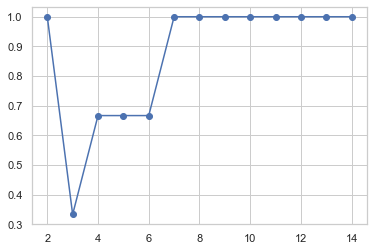

In [47]:
# Optimisation du score sur les donn√©es test
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    #knn.fit(x2train, y2train)
    errors.append(100*(1 - knn.fit(X_train_std,y2train).score(X_test_std,y2test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

### 2√®me M√©thode (plus performante)

#### Nous allons maintenant utiliser la m√©thode "GridSearchCV" pour faire une validation crois√©e du param√®tre k d‚Äôun kNN (le nombre de plus proches voisins) sur le jeu d‚Äôentra√Ænement :

In [48]:
from sklearn import model_selection
# Fixer les valeurs des hyperparam√®tres √† tester
param_grid =  {'n_neighbors': range(2,16) }
# Choisir un score √† optimiser, ici l'accuracy (proportion de pr√©dictions correctes)
score = 'accuracy'

# Cr√©er un classifieur kNN avec recherche d'hyperparam√®tre par validation crois√©e
clf1 = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparam√®tres √† tester
    cv=5,           # nombre de folds de validation crois√©e
    scoring=score   # score √† optimiser
)

# Optimiser ce classifieur sur le jeu d'entra√Ænement
clf1.fit(X_train_std, y2train)

# Afficher le(s) hyperparam√®tre(s) optimaux
print("Meilleur(s) hyperparam√®tre(s) sur le jeu d'entra√Ænement:")
print(clf1.best_params_)

# Afficher les performances correspondantes
print("R√©sultats de la validation crois√©e :")
for mean, std, params in zip(
        clf1.cv_results_['mean_test_score'], # score moyen
        clf1.cv_results_['std_test_score'],  # √©cart-type du score
        clf1.cv_results_['params']           # valeur de l'hyperparam√®tre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparam√®tre(s) sur le jeu d'entra√Ænement:
{'n_neighbors': 4}
R√©sultats de la validation crois√©e :
accuracy = 0.982 (+/-0.010) for {'n_neighbors': 2}
accuracy = 0.988 (+/-0.011) for {'n_neighbors': 3}
accuracy = 0.993 (+/-0.010) for {'n_neighbors': 4}
accuracy = 0.989 (+/-0.007) for {'n_neighbors': 5}
accuracy = 0.990 (+/-0.008) for {'n_neighbors': 6}
accuracy = 0.991 (+/-0.006) for {'n_neighbors': 7}
accuracy = 0.990 (+/-0.007) for {'n_neighbors': 8}
accuracy = 0.991 (+/-0.006) for {'n_neighbors': 9}
accuracy = 0.993 (+/-0.006) for {'n_neighbors': 10}
accuracy = 0.993 (+/-0.006) for {'n_neighbors': 11}
accuracy = 0.993 (+/-0.006) for {'n_neighbors': 12}
accuracy = 0.993 (+/-0.006) for {'n_neighbors': 13}
accuracy = 0.992 (+/-0.005) for {'n_neighbors': 14}
accuracy = 0.991 (+/-0.008) for {'n_neighbors': 15}


In [49]:
y_pred = clf1.predict(X_test_std)
print("\nSur le jeu de test : {:.3f}".format(clf1.score(X_test_std, y2test)))


Sur le jeu de test : 0.993


### Matrice de confusion

In [50]:
x2test.shape

(300, 6)

In [51]:
# afficher les : vrais n√©gatifs, vrais positifs, fauxn√©gatifs, faux positifs
tn0, fp0, fn0, tp0 = confusion_matrix(y2test,clf1.predict(X_test_std)).ravel()
tn0, fp0, fn0, tp0
print('Vrais n√©gatifs :',tn0,"\n"'Vrais positifs :',tp0,"\n"'Faux n√©gatifs :',fn0,"\n"'Faux positifs :',fp0)

Vrais n√©gatifs : 113 
Vrais positifs : 185 
Faux n√©gatifs : 1 
Faux positifs : 1


###  <font color="#8333ff">Taux de positifs class√©s positifs (k-NN)</font>
- La sensibilit√© = VP / VP+FN

In [52]:
sensibilite0=tp0/(tp0+fn0)
sensibilite0

0.9946236559139785

### <font color="#8333ff">Proportion de pr√©dictions correctes parmi les points que l‚Äôon a pr√©dits positifs (Pr√©cision)</font>

In [53]:
pr√©cision0 = tp0/(tp0+fp0)
pr√©cision0

0.9946236559139785

###  <font color="#8333ff">Taux de n√©gatifs class√©s n√©gatifs (k-NN)</font>
 - La sp√©cificit√© = VN / FP+VN

In [54]:
specificite0= tn0/(tn0+fp0)
specificite0

0.9912280701754386

 ## 2. ALGORITHME k-means

#### Dans notre √©tude nous recherchons √† partitionner notre jeu de donn√©es en 2 clusters distincts (vrai et faux billets)

In [55]:
dfkm=data_final.loc[:,['diagonal','height_left','height_right','margin_low','margin_up','length']]
dfkm.head()

diagonal  height_left  height_right  margin_low  margin_up  length
0    171.81       104.86        104.95        4.52       2.89  112.83
1    171.46       103.36        103.66        3.77       2.99  113.09
2    172.69       104.48        103.50        4.40       2.94  113.16
3    171.36       103.91        103.94        3.62       3.01  113.51
4    171.73       104.28        103.46        4.04       3.48  112.54

In [56]:
# Selectionner les valeurs √† utiliser pour notre analyse
from sklearn import decomposition
X = dfkm.values
#Centrage / r√©duction des donn√©es pour que nos donn√©es puissent prendre la m√™me importance
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

### METHODE DU COUDE

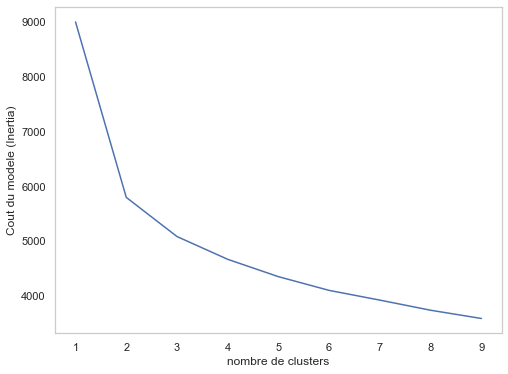

Inertie totale : 3594.078304405085


In [57]:
inertia = []
k_range=range(1,10)
for k in k_range:
    modelkm=KMeans(n_clusters=k).fit(X_scaled)
    inertia.append(modelkm.inertia_)
   
fig = plt.figure(figsize=(8,6))
plt.plot(k_range,inertia )
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.grid() 
plt.show()
print('Inertie totale :',modelkm.inertia_)

##### <font color="#8333ff">Une zone de coude correspondante √† 2 clusters est bien visible</font>

### Application du K-means

In [58]:
from sklearn import cluster, metrics
# Nous d√©ffinissons 2 clusters pour notre mod√®le et entrainons le sur le jeu d'entrainement
model_km = KMeans(n_clusters=2)
km=model_km.fit(X_scaled)
km.predict(X_scaled)

# √©valuer avec le jeu de test
h=km.predict(X_scaled)

# inverser les valeur tel que vrai billet=1 et faux billet=0
a = 1-h
#ypred.inertia_
print('Inertie totale :',km.inertia_)

Inertie totale : 5801.798628796429


#### COEFFICIEN DE SILHOUETTE

In [59]:
silhouette_score(X_scaled,h)

0.3434591797286332

#### Matrice de confusion (k-means)

In [60]:
# taille du jeu de test
a.shape

(1500,)

In [61]:
# afficher les : vrais n√©gatifs, vrais positifs, fauxn√©gatifs, faux positifs
tn1, fp1, fn1, tp1 = confusion_matrix(data_final['is_genuine'],a).ravel()
tn1, fp1, fn1, tp1
print('Vrais n√©gatifs :',tn1,"\n"'Vrais positifs :',tp1,"\n"'Faux n√©gatifs :',fn1,"\n"'Faux positifs :',fp1)

Vrais n√©gatifs : 14 
Vrais positifs : 10 
Faux n√©gatifs : 990 
Faux positifs : 486


###  <font color="#8333ff">Taux de positifs class√©s positifs (Sensibilit√©) (k-means)</font>
- La sensibilit√©, le taux de positifs class√©s positifs = VP / VP+FN

In [62]:
sensibilite1=tp1/(tp1+fn1)
sensibilite1

0.01

### <font color="#8333ff">Proportion de pr√©dictions correctes parmi les points que l‚Äôon a pr√©dits positifs (Pr√©cision)</font>

In [63]:
pr√©cision1 = tp1/(tp1+fp1)
pr√©cision1

0.020161290322580645

###  <font color="#8333ff">Taux de n√©gatifs class√©s n√©gatifs (sp√©cificit√©) (k-means)</font>
 - La sp√©cificit√©, le taux de n√©gatifs class√©s n√©gatifs = VN / FP+VN

In [64]:
specificite1= tn1/(tn1+fp1)
specificite1

0.028

### La courbe ROC  (Receiver Operating Characteristic)

Repr√©senter la sensibilit√© en fonction de la sp√©cificit√© pour diff√©rents seuils de d√©cision s

 - La sensibilit√©, le taux de positifs class√©s positifs = VP / VP+FN
 - La sp√©cificit√©, le taux de n√©gatifs class√©s n√©gatifs = VN / FP+VN

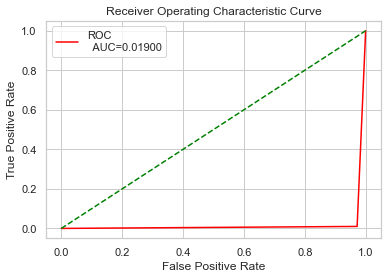

In [65]:
def plot_roc_curve(fp1, tp1):
    aucf =metrics.auc(fp1, tp1)
    plt.plot(fp1, tp1, color='red', label='ROC'+ "\n"'  AUC=%1.5f' % aucf)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

prob = km.predict(X_scaled)
#prob = probs[:, 1]
fp1, tp1, thresholds = roc_curve(data_final['is_genuine'], a)
plot_roc_curve(fp1,tp1 )

## 3.REGRESSION LOGISTIQUE - CLASSIFICATION

### ALGORITHME LogisticRegression


#### Nous allons pour cette r√©gr√©ssion logistique mettre toutes les donn√©es √† la m√™me √©chelle (standardisation) pour √©viter les biais

#### R√©aliser une validation crois√©e(cross validation) par stratification

In [66]:
# d√©ffinissons le nombre de 5 fractionnements pour notre stratification
skf = StratifiedKFold(n_splits=5)
# d√©signons notre target
target = data_final[["is_genuine"]]

model3 = LogisticRegression()
# Cr√©ons une fonction qui prendra les fractions d'entrainements et de tests
def train_model(train, test, fold_no):
    X = ['diagonal','height_left','height_right','margin_low','margin_up','length']
    y = ['is_genuine']
    X_train = train[X]
    y_train = train[y]
    X_test = test[X]
    y_test = test[y]
    model3.fit(X_train,y_train)
    predictions = model3.predict(X_test)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions))
    
# Cr√©ons une boucle en utilisant la cross validation ainsi que la fonction cr√©√©e pr√©c√©demment,
#pour rappel les donn√©es sont standardis√©es    
fold_no = 1
data_dfm = pd.DataFrame(X_scaled,index=dfkm.index, columns=dfkm.columns)
data_dfm['is_genuine'] =target
for train_index, test_index in skf.split(data_dfm, target):
    train = data_dfm.loc[train_index,:]
    test = data_dfm.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1

Fold 1 Accuracy: 0.9866666666666667
Fold 2 Accuracy: 0.9866666666666667
Fold 3 Accuracy: 0.9966666666666667
Fold 4 Accuracy: 0.99
Fold 5 Accuracy: 0.9933333333333333


In [67]:
model3.score(X_test_std,y2test)

0.9933333333333333

In [68]:
X_test_std.shape

(300, 6)

### Afficher le dataset final avec le r√©sultat de la pr√©diction 

In [69]:
tr=data_final.copy()
tr.loc[tr.index, 'pr√©diction'] = model3.predict(X_scaled)
vr_fau=pd.concat([tr, data_final['is_genuine']], axis=1)
resultat= []
for i in vr_fau['pr√©diction'] :
    if i == 1 :
        resultat.append('Vrai Billet')
        
    else :
        resultat.append('Faux Billet')

vr_fau['pr√©diction'] = resultat

vr_fau.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length   pr√©diction  is_genuine  
0  112.83  Vrai Billet           1  
1  113.09  Vrai Billet           1  
2  113.16  Vrai Billet           1  
3  113.51  Vrai Billet           1  
4  112.54  Vrai Billet           1

#### V√©rifier la taille des donn√©es 

In [70]:
vr_fau.shape

(1500, 9)

#### Matrice de confusion

In [71]:
# afficher les : vrais n√©gatifs, vrais positifs, faux n√©gatifs, faux positifs
tn, fp, fn, tp = confusion_matrix(data_final['is_genuine'],model3.predict(X_scaled)).ravel()
tn, fp, fn, tp
print('Vrais n√©gatifs :',tn,"\n"'Vrais positifs :',tp,"\n"'Faux n√©gatifs :',fn,"\n"'Faux positifs :',fp)

Vrais n√©gatifs : 491 
Vrais positifs : 998 
Faux n√©gatifs : 2 
Faux positifs : 9


### La courbe ROC  (Receiver Operating Characteristic)

Repr√©senter la sensibilit√© en fonction de la sp√©cificit√© pour diff√©rents seuils de d√©cision s

 - La sensibilit√©, le taux de positifs class√©s positifs = VP / VP+FN
 - La sp√©cificit√©, le taux de n√©gatifs class√©s n√©gatifs = VN / FP+VN

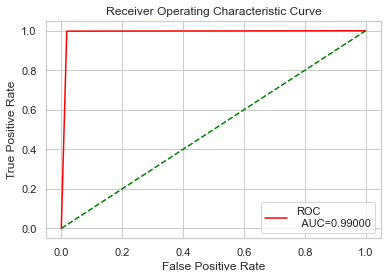

In [72]:
from sklearn import metrics
def plot_roc_curve(fper, tper):
    aucf =metrics.auc(fper, tper)
    plt.plot(fper, tper, color='red', label='ROC'+ "\n"'  AUC=%1.5f' % aucf)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

prob = model3.predict(X_scaled)
#prob = probs[:, 1]
fper, tper, thresholds = roc_curve(data_final['is_genuine'], prob)
plot_roc_curve(fper,tper )


###  <font color="#8333ff">Taux de positifs class√©s positifs (Sensibilit√©-Rappel)</font>

In [73]:
sensibilit√©=tp/(tp+fn)
sensibilit√©

0.998

### <font color="#8333ff">Proportion de pr√©dictions correctes parmi les points que l‚Äôon a pr√©dits positifs (Pr√©cision)</font>

In [74]:
pr√©cision = tp/(tp+fp)
pr√©cision

0.9910625620655412

###  <font color="#8333ff">Taux de n√©gatifs class√©s n√©gatifs (Sp√©cificit√©)</font>

In [75]:
sp√©cificit√©= tn/(tn+fp)
sp√©cificit√©

0.982

##  <font color="#8333ff">V. CONCLUSION</font>

Les 2 mod√®les fournissent une tr√®s bonne performance malgr√© les quelques erreurs:

- L'introduction de  faux billets est le principal crit√®re √† prendre en compte, la s√©lection du mod√®le se basera donc sur la meilleure pr√©cision
- La r√©gression logistique r√©pond parfaitement √† cette exigence


## D√âPLOIEMENT DU MOD√àLE

###  <font color="#8333ff">ENREGISTRER LE MOD√àLE LE PLUS PERFORMANT POUR G√âN√âRALISATION</font>

In [76]:
# enregistrer le mod√®le
import pickle
pickle.dump(model3, open("model3.pkl", "wb"))


###  <font color="#8333ff">TEST SOUTENANCE</font>

In [77]:
# Charger le dataset
tests=pd.read_csv('billets_production.csv',sep=',')
tests=tests.drop(["id"],axis=1)

# standardisation des donn√©es
std_scale = preprocessing.StandardScaler().fit(tests)
X_scaled6 = std_scale.transform(tests)
tests.loc[tests.index,"pr√©diction"] = model3.predict(X_scaled6)

# Affichage des pr√©dictions
resultat9= []
for i in tests['pr√©diction'] :
    if i == 1 :
        resultat9.append('Vrai Billet')
        
    else :
        resultat9.append('Faux Billet')

tests['pr√©diction'] = resultat9

# Afficher le r√©sultat en chiffre
print(tests['pr√©diction'].value_counts())

tests.head()

Faux Billet    3
Vrai Billet    2
Name: pr√©diction, dtype: int64


diagonal  height_left  height_right  margin_low  margin_up  length  \
0    171.76       104.01        103.54        5.21       3.30  111.42   
1    171.87       104.17        104.13        6.00       3.31  112.09   
2    172.00       104.58        104.29        4.99       3.39  111.57   
3    172.49       104.55        104.34        4.44       3.03  113.20   
4    171.65       103.63        103.56        3.77       3.16  113.33   

    pr√©diction  
0  Faux Billet  
1  Faux Billet  
2  Faux Billet  
3  Vrai Billet  
4  Vrai Billet